<h1><b>Hands-On Exam (MidTerm) - Chicago Crime Records Report</b></h1>
<hr>
<h3>Data Analyst : John Marc De Villa</h3>
<h3>Year&Section : BSIT - 3A

In [4]:
import numpy as np
import pandas as pd
import calendar
import warnings
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
chicago_crimes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Chicago_Crimes.csv')

In [5]:
chicago_crimes['Date'] = chicago_crimes['Date'].astype(str)
chicago_crimes['Date'] = chicago_crimes['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
chicago_crimes['Date'] = chicago_crimes['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
chicago_crimes['Date'] = pd.to_datetime(chicago_crimes['Date'], dayfirst=True, errors='coerce')
chicago_crimes['Updated On'] = pd.to_datetime(chicago_crimes['Updated On'], errors='coerce')


chicago_crimes.dtypes
chicago_crimes.isnull().sum()

chicago_crimes['Date_Year'] = chicago_crimes['Date'].dt.year
chicago_crimes['Month'] =  chicago_crimes['Date'].dt.month_name()
chicago_crimes['Day'] =  chicago_crimes['Date'].dt.day
chicago_crimes['Time'] =  chicago_crimes['Updated On'].dt.strftime('%I:%M:%S %p')
chicago_crimes['DayOfWeek'] =  chicago_crimes['Date'].dt.day_name()
chicago_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Date_Year,Month,Day,Time,DayOfWeek
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,2024,2024-12-21 15:40:46,41.821236,-87.619921,"(41.821236024, -87.619920712)",2024,April,14,03:40:46 PM,Sunday
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,2024,2024-12-21 15:40:46,41.852052,-87.683801,"(41.852051675, -87.683800849)",2024,April,14,03:40:46 PM,Sunday
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,2024,2024-12-21 15:40:46,41.907640,-87.735587,"(41.907640473, -87.735587478)",2024,April,14,03:40:46 PM,Sunday
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,2024,2024-12-21 15:40:46,41.877997,-87.724121,"(41.877997275, -87.724120826)",2024,April,14,03:40:46 PM,Sunday
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,2024,2024-12-21 15:40:46,41.689421,-87.650123,"(41.6894214, -87.650123247)",2024,April,14,03:40:46 PM,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,2025,2025-04-19 15:41:24,41.928440,-87.700416,"(41.928439867, -87.700415972)",2025,December,4,03:41:24 PM,Thursday
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,2025,2025-04-19 15:41:24,41.723545,-87.632040,"(41.723545182, -87.632039508)",2025,December,4,03:41:24 PM,Thursday
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2025,2025-04-19 15:41:24,41.740998,-87.638606,"(41.74099774, -87.638606337)",2025,December,4,03:41:24 PM,Thursday
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,2025,2025-04-19 15:41:24,41.802477,-87.652657,"(41.802477219, -87.652657244)",2025,December,4,03:41:24 PM,Thursday


In [6]:
chicago_crimes.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,857
Arrest,0
Domestic,0


In [7]:
chicago_crimes['Location Description'] = chicago_crimes['Location Description'].fillna('Unknown')
chicago_crimes['Community Area'] = chicago_crimes['Community Area'].fillna(chicago_crimes['Community Area'].mode()[0])
chicago_crimes['X Coordinate'] = chicago_crimes['X Coordinate'].fillna(chicago_crimes['X Coordinate'].mode()[0])
chicago_crimes['Y Coordinate'] = chicago_crimes['Y Coordinate'].fillna(chicago_crimes['Y Coordinate'].mode()[0])
chicago_crimes['Latitude'] = chicago_crimes['Latitude'].fillna(chicago_crimes['Latitude'].mode()[0])
chicago_crimes['Longitude'] = chicago_crimes['Longitude'].fillna(chicago_crimes['Longitude'].mode()[0])
chicago_crimes['Location'] = chicago_crimes['Location'].fillna(chicago_crimes['Location'].mode()[0])


chicago_crimes['Date'] = chicago_crimes['Date'].astype('category')
chicago_crimes['Primary Type'] = chicago_crimes['Primary Type'].astype('category')
chicago_crimes['Description'] = chicago_crimes['Description'].astype('category')
chicago_crimes['Location Description'] = chicago_crimes['Location Description'].astype('category')
chicago_crimes['Updated On'] = chicago_crimes['Updated On'].astype('category')
chicago_crimes['Month'] = chicago_crimes['Month'].astype('category')
chicago_crimes['Day'] = chicago_crimes['Day'].astype('category')
chicago_crimes['Time'] = chicago_crimes['Time'].astype('category')
chicago_crimes['DayOfWeek'] = chicago_crimes['DayOfWeek'].astype('category')
chicago_crimes['Date_Year'] = chicago_crimes['Date_Year'].astype('category')

chicago_crimes.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


<h1><b>Chicago Crime Records Report</b></h1>
<hr>
<br>
<img src='https://www.usatoday.com/gcdn/presto/2018/09/20/USAT/20f24bda-013c-4810-a58c-96dc3ea9ad9c-CHICAGO_CRIME_GUN_VIOLENCE.JPG?crop=5759,3224,x0,y0&width=3200&height=1792&format=pjpg&auto=webp'>

<h2><b>Questions❓</b></h2>
<ul><h3>1. How does the total number of crimes change between the first and last year in the dataset? </h3></ul>
<hr>

In [8]:
chicago_crimes['Year'].value_counts()

,count
Year,
2024,188918
2025,60205


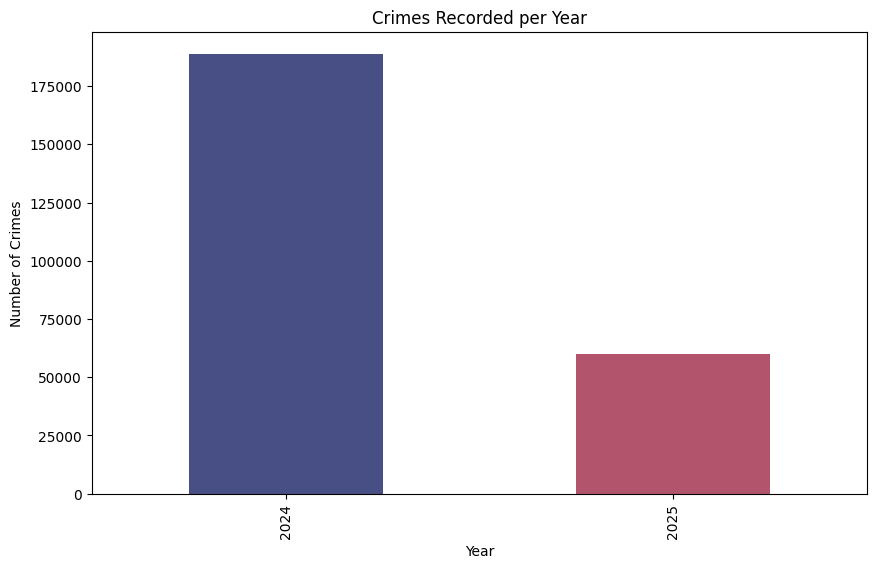

In [9]:
crimes_per_year = chicago_crimes['Year'].value_counts().sort_index()

crimes_per_year.plot(kind='bar', figsize=(10,6), color = ["#484f85", "#b3546d"])
plt.title('Crimes Recorded per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

print()

#----------------------------------------------------------------------------

# **Insight 💡**

<ol><h3>
    <li>The total number of crimes decreased from 188,918 in 2024 to 60,205 in 2025, showing a significant decline of approximately 68% over the years.</li>
    </h3>

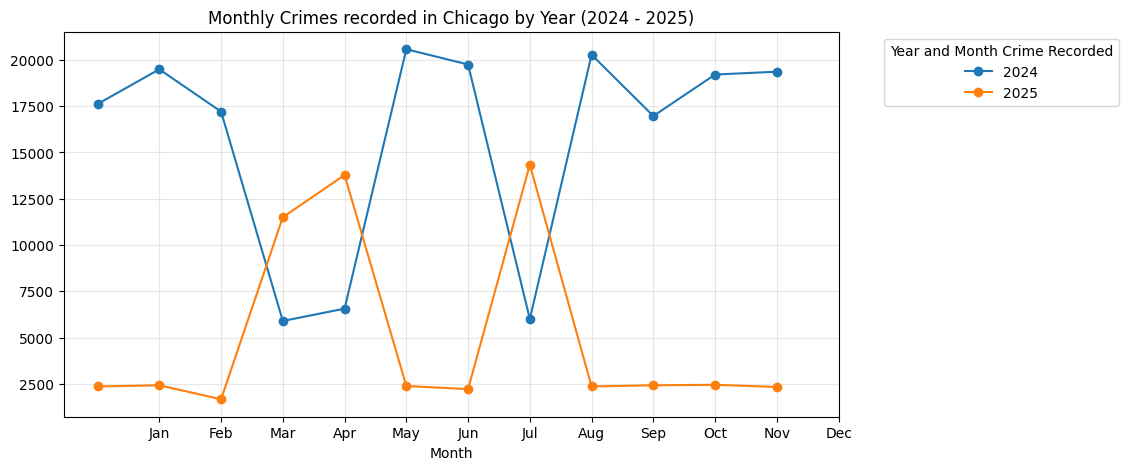

In [10]:
monthly_data = chicago_crimes.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Crimes recorded in Chicago by Year (2024 - 2025)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Crime Recorded', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# **Insight 💡**

<ol start = 2><h3>
    <li>The line graph compares the monthly crimes in Chicago for the years 2024 and 2025.</li>
    <li>In 2024, crime counts remained consistently high across most months, with May and August peaking.</li>
    <li>While 2025 shows much lower crime counts overall, except for noticeable spikes in March, April, and July.</li>
    </h3>

<h2><b>Questions❓</b></h2>
<ul><h3>2. Which month recorded the highest number of crimes in the dataset? </h3></ul>
<hr>



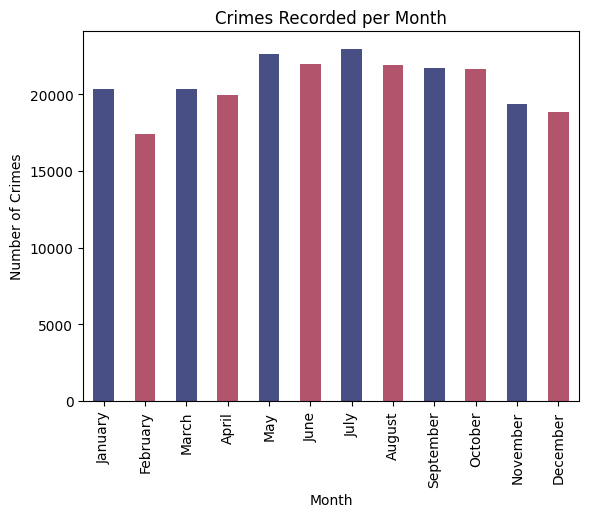

In [11]:
crimes_per_month = chicago_crimes['Month'].value_counts().sort_index()

month_order = list(calendar.month_name[1:])
crimes_per_month = crimes_per_month.reindex(month_order)

crimes_per_month.plot(kind='bar',color = ["#484f85", "#b3546d"])
plt.title('Crimes Recorded per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

print()
#----------------------------------------------------------------------------


# **Insight 💡**

<ol start = 5><h3>
    <li>The month of July recorded the highest number of crimes.</li>
    <li>May followed as the second-highest month for crime occurrences.</li>
    <li>In contrast, February had the lowest number of crimes in the dataset.</li></h3>

<h2><b>Questions❓</b></h2>
<ul><h3>3. What are the top 10 most frequent Primary Type of crimes?  </h3></ul>
<hr>




In [12]:
chicago_crimes['Primary Type'].value_counts()

,count
Primary Type,
THEFT,59201
BATTERY,44579
CRIMINAL DAMAGE,27094
ASSAULT,22615
MOTOR VEHICLE THEFT,19604
OTHER OFFENSE,16781
DECEPTIVE PRACTICE,14991
BURGLARY,8443
ROBBERY,8200


<Axes: xlabel='Primary Type'>

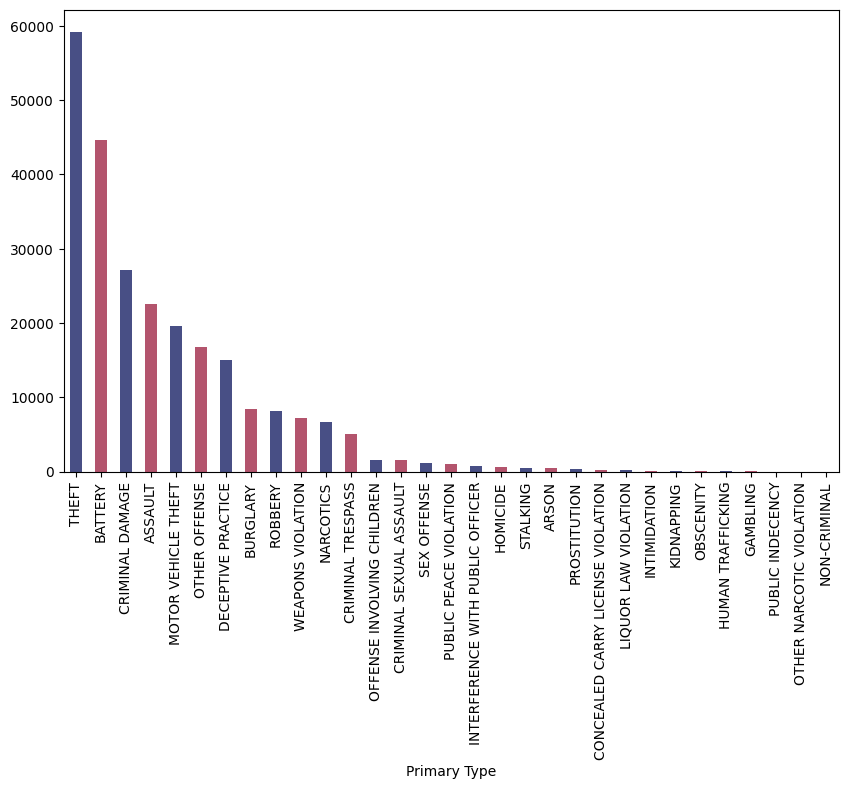

In [13]:
chicago_crimes['Primary Type'].value_counts().plot(kind='bar',
                                                   figsize=(10,6),
                                                   color = ["#484f85", "#b3546d"])


# **Insight 💡**

<ol start = 8><h3>
    <li> the top 10 most frequent Primary Type of crimes recorded in Chicago are</li>
      <ul><h5><li>THEFT</li>
      <li>BATTERY</li>
      <li>CRIMINAL DAMAGE</li>
      <li>ASSAULT</li>
      <li>MOTOR VEHICLE THEFT</li>
      <li>OTHER OFFENSE</li>
      <li>DECEPTIVE PRACTICE</li>
      <li>BURGLARY</li>
      <li>ROBBERY</li>
      <li>WEAPONS VIOLATION</li></h5></ul>
<li> Based on the dataset, the least recorded primary crime type in Chicago is <b>“Non-Criminal,”</b> with only four cases reported.followed by <b>"Other Narcotic Violation"</b> with only seven cases recorded.</li>
    </h3>

In [14]:
chicago_crimes.dtypes

,0
ID,int64
Case Number,object
Date,category
Block,object
IUCR,object
Primary Type,category
Description,category
Location Description,category
Arrest,bool
Domestic,bool


<h2><b>Questions❓</b></h2>
<ul><h3>4. What is the most frequent primary crime type recorded in the month of January?   </h3></ul>
<hr>




In [15]:
CC_Dec = chicago_crimes[chicago_crimes['Month'] =='December']
PTypes_dec = CC_Dec['Primary Type'].value_counts()
PTypes_dec

,count
Primary Type,
THEFT,4523
BATTERY,3455
CRIMINAL DAMAGE,2046
ASSAULT,1626
MOTOR VEHICLE THEFT,1429
OTHER OFFENSE,1328
DECEPTIVE PRACTICE,1000
BURGLARY,738
ROBBERY,639


<Axes: xlabel='Primary Type'>

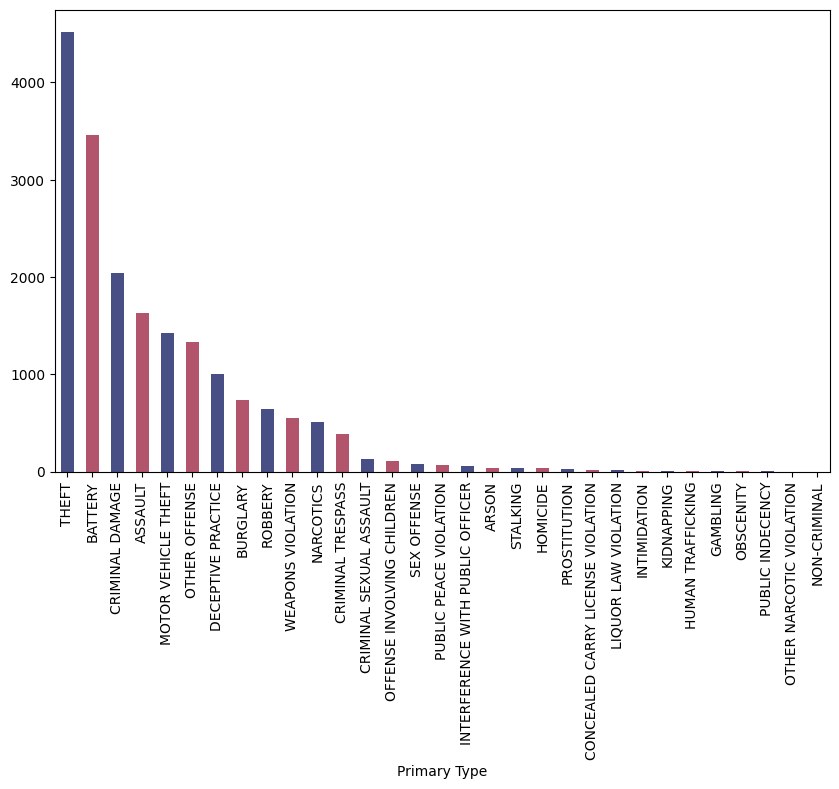

In [16]:
CC_Dec['Primary Type'].value_counts().plot(kind='bar',figsize=(10,6), color = ["#484f85", "#b3546d"])


# **Insight 💡**

<ol start = 10><h3>
    <li>Theft is the most common crime recorded in January, with a total of 4,523 cases.</li>
    <li> Battery follows as the second most common crime, with 3,455 cases reported during the same month.</li>
    </h3>
    </ol>
  <hr>

<h2><b>Questions❓</b></h2>
<ul><h3>5. For the year 2024, which month had the most and the fewest theft arrests in Chicago?  </h3></ul>
<hr>



In [17]:
year_2024 = chicago_crimes[chicago_crimes['Year']== 2024]
year_2025 = chicago_crimes[chicago_crimes['Year']== 2025]

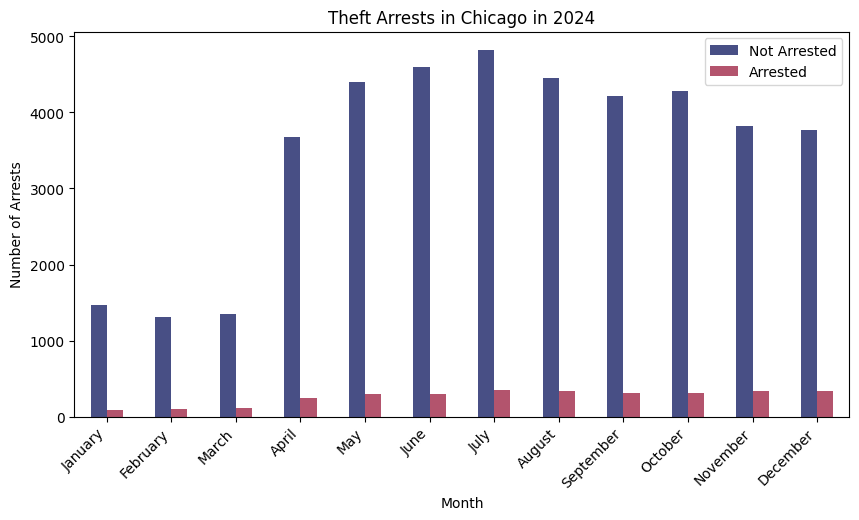

In [18]:
Theft_arrests_2024 = year_2024[year_2024['Primary Type'] == 'THEFT']


arrest_counts = Theft_arrests_2024.groupby(['Month', 'Arrest']).size().unstack(fill_value=0).reindex(month_order)
arrest_counts.plot(
    kind='bar',
    figsize=(10,5),
    stacked=False,
    color = ["#484f85", "#b3546d"]
)
plt.title("Theft Arrests in Chicago in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")
plt.legend(["Not Arrested", "Arrested"])
plt.xticks(rotation=45, ha='right'
)
plt.show()

In [19]:
arrest_counts = Theft_arrests_2024.groupby(['Month', 'Arrest']).size().unstack(fill_value=0).reindex(month_order)

arrest_counts

Arrest,False,True
Month,,
January,1463,83
February,1303,94
March,1344,108
April,3674,247
May,4404,297
June,4596,293
July,4823,347
August,4449,334
September,4217,315


# **Insight 💡**

<ol start = 12><h3>
    <li>In 2024, the month of July had the highest number of theft arrests, with a total of 347 cases. This could mean that theft incidents were more common or that police activity was higher during this month.</li>
    <li>On the other hand, January recorded the fewest theft arrests, with only 83 cases, suggesting that fewer thefts happened early in the year.</li>
    </h3>
    </ol>
  <hr>

<h2><b>Questions❓</b></h2>
<ul><h3>6. What percentage of all crimes result in an arrest each year?   </h3></ul>
<hr>



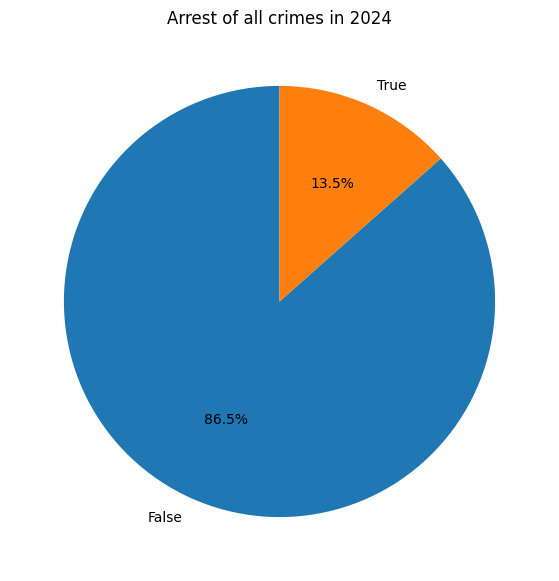

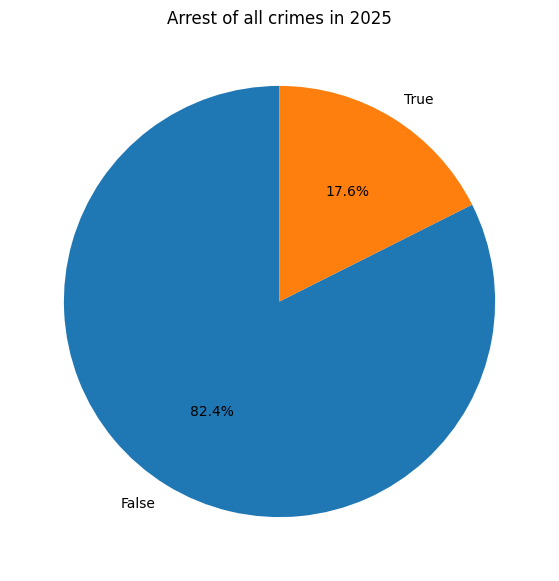

In [20]:
arrest_counts_2024 = year_2024['Arrest'].value_counts()

plt.pie(arrest_counts_2024,
        labels = arrest_counts_2024.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Arrest of all crimes in 2024')
plt.show()


arrest_counts_2025 = year_2025['Arrest'].value_counts()

plt.pie(arrest_counts_2025,
        labels = arrest_counts_2025.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Arrest of all crimes in 2025')
plt.show()



# **Insight 💡**

<ol start = 14><h3>
    <li>  In 2024, about 13.5% of all reported crimes in Chicago resulted in an arrest.</li>
    <li>In 2025, the percentage increased to 17.6%, showing an improvement in arrest rates compared to the previous year.</li>
    <li>Among the two years, 2025 recorded the highest number of arrest cases, indicating better enforcement outcomes or improved case resolution during that year.</li>
    <li>This rise suggests that law enforcement efforts may have become more effective or that fewer crimes were reported, making arrests more proportionally frequent.</li>
    
    </h3>
    </ol>
  <hr>

<h2><b>Questions❓</b></h2>
<ul><h3>7. Where are most arrests made geographically in 2024?   </h3></ul>
<hr>



In [21]:
# locations_2024  = list(zip(year_2024['Latitude'],year_2024['Longitude']))

# map_2024 = folium.Map(location=[year_2024['Latitude'].mean(), year_2024['Longitude'].mean()], zoom_start=10)

# HeatMap(locations_2024).add_to(map_2024)

# map_2024.save('accident_heatmap.html')

# map_2024


In [22]:
Theft_arrests_2024

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Date_Year,Month,Day,Time,DayOfWeek
0,13439321,JH237424,2024-04-14 00:00:00,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,2024,2024-12-21 15:40:46,41.821236,-87.619921,"(41.821236024, -87.619920712)",2024,April,14,03:40:46 PM,Sunday
4,13430098,JH226395,2024-04-14 00:00:00,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,2024,2024-12-21 15:40:46,41.689421,-87.650123,"(41.6894214, -87.650123247)",2024,April,14,03:40:46 PM,Sunday
6,13433967,JH230946,2024-04-14 00:00:00,053XX N ASHLAND AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,False,...,2024,2024-12-21 15:40:46,41.978617,-87.669681,"(41.978617113, -87.669680906)",2024,April,14,03:40:46 PM,Sunday
20,13428796,JH224490,2024-04-14 00:00:00,0000X W 111TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,2024,2024-12-21 15:40:46,41.692566,-87.624705,"(41.692566169, -87.624705479)",2024,April,14,03:40:46 PM,Sunday
23,13443237,JH242275,2024-04-14 00:00:00,006XX W MONTROSE DR,0810,THEFT,OVER $500,OTHER (SPECIFY),False,False,...,2024,2024-12-21 15:40:46,41.962034,-87.645899,"(41.96203391, -87.645898728)",2024,April,14,03:40:46 PM,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188823,13717044,JJ110147,2024-12-31 21:00:00,004XX N Wabash ave,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,2024,2025-01-13 15:40:58,41.888994,-87.626935,"(41.888993854, -87.626934833)",2024,December,31,03:40:58 PM,Tuesday
188835,13708417,JJ100193,2024-12-31 21:45:00,008XX E 65TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,2024,2025-01-08 15:42:09,41.776795,-87.604216,"(41.776795343, -87.604216245)",2024,December,31,03:42:09 PM,Tuesday
188836,13707798,JH561745,2024-12-31 21:45:00,008XX N MICHIGAN AVE,0810,THEFT,OVER $500,STREET,False,False,...,2024,2025-01-08 15:42:09,41.898768,-87.624116,"(41.898767916, -87.624116333)",2024,December,31,03:42:09 PM,Tuesday
188892,13716826,JJ110744,2024-12-31 23:00:00,005XX S MICHIGAN AVE,0810,THEFT,OVER $500,HOTEL / MOTEL,False,False,...,2024,2025-01-13 15:40:58,41.875273,-87.624251,"(41.875272573, -87.624251314)",2024,December,31,03:40:58 PM,Tuesday


<h2><b>Questions❓</b></h2>
<ul><h3>8. What are the most common Description categories for theft crimes?</h3></ul>
<hr>


<Axes: xlabel='Description'>

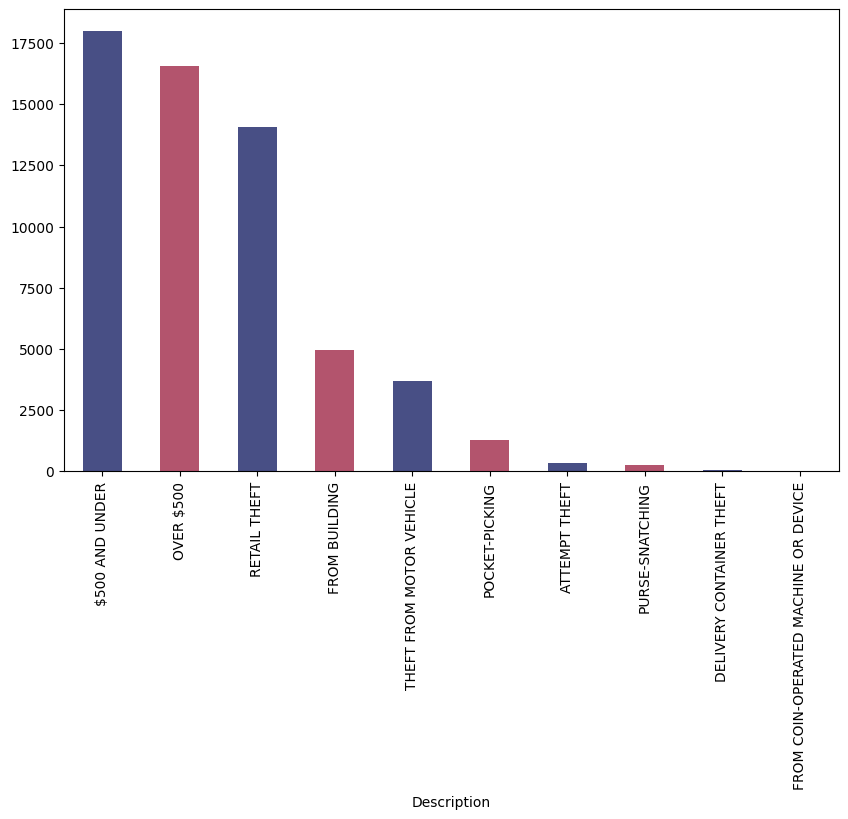

In [23]:
theft_description = chicago_crimes[chicago_crimes['Primary Type'] == "THEFT"]

theft_description['Description'].value_counts().head(10).plot(kind='bar',figsize=(10,6), color = ["#484f85", "#b3546d"])

In [24]:
theft_description['Description'].value_counts().head(10)

,count
Description,
$500 AND UNDER,17963
OVER $500,16572
RETAIL THEFT,14053
FROM BUILDING,4941
THEFT FROM MOTOR VEHICLE,3701
POCKET-PICKING,1301
ATTEMPT THEFT,349
PURSE-SNATCHING,263
DELIVERY CONTAINER THEFT,43


# **Insight 💡**

<ol start = 18><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>







<h2><b>Questions❓</b></h2>
<ul><h3>9. Which District has the highest crime rate? </h3></ul>
<hr>


In [29]:


print(highest_district.head(31))

    District  Crime Count
7          8        16691
11        12        15355
0          1        14409
5          6        14157
17        19        13640
10        11        13423
3          4        13318
16        18        13118
1          2        12848
21        25        12664
2          3        12545
8          9        10910
6          7        10520
9         10        10133
4          5         9883
12        14         9341
13        15         8605
14        16         8570
20        24         8101
15        17         7801
19        22         7710
18        20         5362
22        31           19


In [26]:
chicago_crimes['District'].value_counts()

,count
District,
8,16691
12,15355
1,14409
6,14157
19,13640
11,13423
4,13318
18,13118
2,12848


# **Insight 💡**

<ol start = 21><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>




<h2><b>Questions❓</b></h2>
<ul><h3>10. Which District has the highest crime rate? </h3></ul>
<hr>


# **Insight 💡**

<ol start = 24><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>



<h2><b>Questions❓</b></h2>
<ul><h3>11. Which District has the highest crime rate? </h3></ul>
<hr>


# **Insight 💡**

<ol start = 27><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>



<h2><b>Questions❓</b></h2>
<ul><h3>12. Which District has the highest crime rate? </h3></ul>
<hr>


# **Insight 💡**

<ol start = 30><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>



<h2><b>Questions❓</b></h2>
<ul><h3>13. Which District has the highest crime rate? </h3></ul>
<hr>


# **Insight 💡**

<ol start = 33><h3>
    <li>  The most common description categories for theft-related crimes are <b> “$500 and Under” (17,963 cases), “Over $500” (16,572 cases), and “Retail Theft” (14,053 cases)</b>. </li>
    <li>These results show that most theft incidents in Chicago involve property or money-related offenses, especially those with lower monetary values. </li>
    <li> Less frequent categories include “From Building,” “Theft from Motor Vehicle,” and “Pocket-Picking,” while crimes like “Delivery Container Theft” and “From Coin-Operated Machine” are the least common.</li>
    </h3>
    </ol>
  <hr>

